In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [2]:
G = 6.67408e-11 # m3 kg-1 s-2
Mjup = 1.89813e27 # kg
Msun = 1.98e30 # kg

Mstar = 1*Msun
M_A = 1*Mjup
M_B = 0.011*Mjup
P_A = 12 * 365.25*86400 # seconds
P_B = 1 * 365.25*86400 # seconds


In [3]:
def semimajoraxis(M,m,P):
    return np.cbrt( G * P**2 * (M+m) /(4*np.pi**2))

def circular_velocity(M,r):
    return np.sqrt(G*M/r)

#### It would be nice to do this in a "Class" but due to time we wont

In [4]:
def accelleration(all_M, all_r):
    """
    Return accellerations on all particles. 
    Assumes the first M is the central star, we ignore this 
    """
    n = len(all_M) 
    all_a = [[0,0]] # assume 0 accelleration on Star
    for j in range(1,n): # ignore central star, start at 1
        a = 0
        for i in range(0,n):
            if i != j:
                posdiff = all_r[i] - all_r[j]
                # Sum over all particles that are not j
                a += G*all_M[i] / (np.linalg.norm(posdiff)**3) * posdiff
        all_a.append(a)
    
    return np.array(all_a)
    

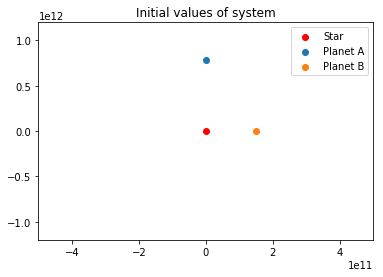

In [11]:
r_A = semimajoraxis(Mstar,M_A,P_A)
v_A = circular_velocity(Mstar,r_A) 
v_A = [-v_A,0] # initial velocity
r_A = [0,r_A] # starting position

r_B = semimajoraxis(Mstar,M_B,P_B)
v_B = circular_velocity(Mstar,r_B)
v_B = [0, v_B]
r_B = [r_B,0]

rstar = [0,0]
vstar = [0,0]

all_M = np.array([Mstar, M_A, M_B])
all_r = np.array([rstar, r_A, r_B])
all_v = np.array([vstar, v_A, v_B])
all_a = np.array([[0,0],[0,0],[0,0]])

def plot_system():
    plt.title("Initial values of system")
    plt.scatter(*all_r[0],c='r',label='Star')
    plt.scatter(*all_r[1],label='Planet A')
    plt.scatter(*all_r[2],label='Planet B')
    plt.legend()
    plt.xlim(-5e11,5e11)
    plt.ylim(-12e11,12e11)
    plt.show()
    
plot_system()

def do_onestep():
    global all_a, all_r, all_M, all_v
    
    all_a = accelleration(all_M,all_r)
    all_r += all_v*dt
    all_v += all_a*dt
    
integrated_r = [np.copy(all_r)] # save all positions through time

ndays = 1 # amount of days as timestep
dt = ndays*86400 # seconds 
t_end = 120*365.25*86400 # 120 years in seconds
n_steps = int(t_end/dt)+1

for i in tqdm(range(n_steps)):
    do_onestep()
    integrated_r.append(np.copy(all_r))
    if i > 1:
        if np.linalg.norm(integrated_r[i]-integrated_r[i-1]) == 0:
            raise ValueError("No change, timestep too small?")
    
integrated_r = np.array(integrated_r)

def plot_integration(integrated_r):
    t = 0
    plt.scatter(*integrated_r[t,1,:],label='Planet A') # Planet A
    plt.scatter(*integrated_r[t,2,:], label='Planet B') # Planet B
    
    max_points = 1000 # plot maximally 500 points
    step = integrated_r.shape[0]//max_points
    
    for t in range(1,integrated_r.shape[0],step):
#         print (integrated_r[t,1,:]-integrated_r[t,1,:])
        plt.scatter(*integrated_r[t,1,:],c='C0',s=0.1) # Planet A
        plt.scatter(*integrated_r[t,2,:],c='C1',s=0.1) # Planet B
    plt.scatter(*integrated_r[0,0,:],c='r',label='Star')
    plt.legend(frameon=False)
    plt.xlim(-1e12,1e10)
    plt.ylim(-12e11,12e11)
    plt.show()
    


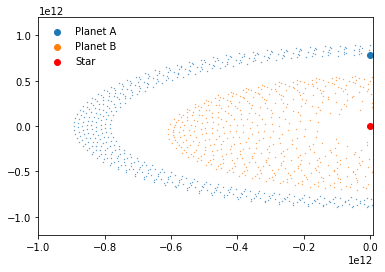

In [12]:
plot_integration(integrated_r)